In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data=pd.read_csv('Food-Truck.csv')

In [34]:
data


,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


<AxesSubplot: xlabel='6.1101'>

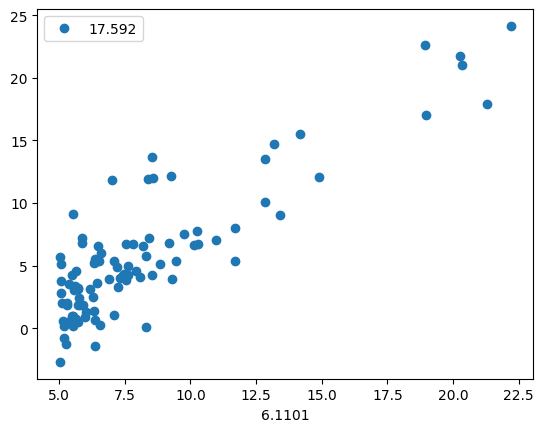

In [35]:
df=data.plot(x='6.1101',y='17.592',style='o')
df

In [36]:
x_mean=data['6.1101'].mean()
y_mean=data['17.592'].mean()

In [37]:
print(x_mean,y_mean)

8.181151041666668 5.716709375000001


In [38]:
data['x']=data['6.1101']-x_mean
data['y']=data['17.592']-y_mean
data['x^2']=data['x']**2
data['y^2']=data['y']**2
data['x*y']=data['x']*data['y']
data

,6.1101,17.592,x,y,x^2,y^2,x*y
0,5.5277,9.13020,-2.653451,3.413491,7.040802,11.651918,-9.057530
1,8.5186,13.66200,0.337449,7.945291,0.113872,63.127643,2.681130
2,7.0032,11.85400,-1.177951,6.137291,1.387569,37.666336,-7.229428
3,5.8598,6.82330,-2.321351,1.106591,5.388671,1.224543,-2.568785
4,8.3829,11.88600,0.201749,6.169291,0.040703,38.060147,1.244648
...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,5.338184,2.208763,-3.433771
92,5.3054,1.98690,-2.875751,-3.729809,8.269944,13.911478,10.726003
93,8.2934,0.14454,0.112249,-5.572169,0.012600,31.049072,-0.625470
94,13.3940,9.05510,5.212849,3.338391,27.173794,11.144852,17.402526


In [39]:
sum_xy=data['x*y'].sum()
sum_xsqr=data['x^2'].sum()
sum_ysqr=data['y^2'].sum()
print(sum_xy,sum_xsqr,sum_ysqr)

1739.5603117330625 1433.4508245398956 2775.2783647179626


In [40]:
corr=sum_xy / (sum_xsqr*sum_ysqr)**0.5
print(corr)

0.8721572919685902


In [49]:
def getMean(num):
    if len(num) == 0:
        return None
    else:
        sum = 0
    for i in num:
        sum += i
    avg = sum/len(num)
    return avg

In [52]:
def getStandardDeviation(num):
    if len(num) == 0:
        return 0
    else:
        mean = getMean(num)
    std_deviation = 0
    for i in num:
        std_deviation += (i - mean)**2
    return (std_deviation/len(num))**0.5

In [56]:
std_deviation_x = getStandardDeviation(data["x"].tolist())
std_deviation_y = getStandardDeviation(data["y"].tolist())
print(std_deviation_x, std_deviation_y)

3.8641660707441887 5.37672294548257


In [57]:
m = corr * (std_deviation_y / std_deviation_x)
m

1.2135472539083578

In [58]:
c = data["17.592"].mean() - m * data["6.1101"].mean()
c

-4.211504005424086

In [59]:
data["y_predict"] = m * data["6.1101"] + c
data

,6.1101,17.592,x,y,x^2,y^2,x*y,y_predict
0,5.5277,9.13020,-2.653451,3.413491,7.040802,11.651918,-9.057530,2.496621
1,8.5186,13.66200,0.337449,7.945291,0.113872,63.127643,2.681130,6.126220
2,7.0032,11.85400,-1.177951,6.137291,1.387569,37.666336,-7.229428,4.287210
3,5.8598,6.82330,-2.321351,1.106591,5.388671,1.224543,-2.568785,2.899640
4,8.3829,11.88600,0.201749,6.169291,0.040703,38.060147,1.244648,5.961541
...,...,...,...,...,...,...,...,...
91,5.8707,7.20290,-2.310451,1.486191,5.338184,2.208763,-3.433771,2.912868
92,5.3054,1.98690,-2.875751,-3.729809,8.269944,13.911478,10.726003,2.226850
93,8.2934,0.14454,0.112249,-5.572169,0.012600,31.049072,-0.625470,5.852929
94,13.3940,9.05510,5.212849,3.338391,27.173794,11.144852,17.402526,12.042748


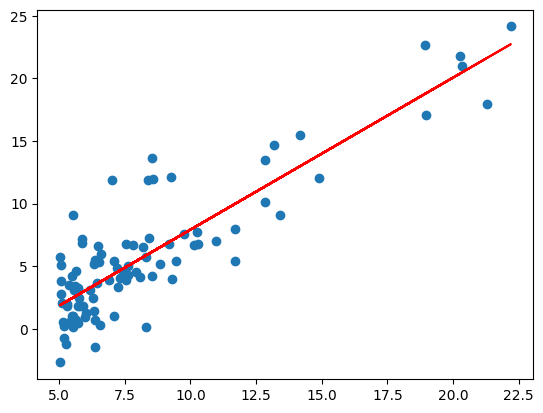

In [60]:
plot1 = plt.scatter(data["6.1101"], data["17.592"])
plot2 = plt.plot(data["6.1101"], data["y_predict"],color="red")
plt.show()

In [61]:
ssr = sum((data["y_predict"]-y_mean)**2)
ssr

2111.0386393116246

In [63]:
sse = ((data["17.592"]-data["y_predict"])**2).sum()
sse

664.2397254063369

In [66]:
sst = sum((data["17.592"]-y_mean)**2)
sst

2775.2783647179617

In [67]:
sst = sum((data["17.592"]-y_mean)**2)
sst

2775.2783647179617

In [68]:
r2 = ssr/sst
r2

0.7606583419339845

In [69]:
cost=(data["17.592"]-data["y_predict"])
cost

0     6.633579
1     7.535780
2     7.566790
3     3.923660
4     5.924459
        ...   
91    4.290032
92   -0.239950
93   -5.708389
94   -2.987648
95   -1.769381
Length: 96, dtype: float64